<a href="https://colab.research.google.com/github/Chaaand03/NIRF-Rank-predictor/blob/main/Copy_of_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from pandas import DataFrame
from sklearn import preprocessing
from matplotlib import cm
import seaborn as sns

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , recall_score ,  precision_score
from sklearn.metrics import classification_report

In [ ]:
# Import Machine learning algorithms

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

#Split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

In [ ]:
dt=pd.read_csv("/content/EngineeringRanking.csv")

In [ ]:
#Before Preprocessing
dt.tail()

,Institute Id,Institute Name,City,State,Score_21,Rank_21,TLR_21,RPC_21,GO_21,OI_21,...,GO_17,OI_17,Perception_17,Score_16,Rank_16,TLR_16,RPC_16,GO_16,OI_16,Perception_16
268,IR17-ENGG-1-26228,C.V. Raman College of Engineering,Bhubneshwar,Odisha,NaN,NaN,NaN,NaN,NaN,NaN,...,49.95,72.48,21.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,IR17-ENGG-2-10476,"Maharashtra Institute of Technology, Pune",Pune,Maharashtra,NaN,NaN,NaN,NaN,NaN,NaN,...,52.13,63.39,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,IR17-ENGG-2-12411,Sri Sai Ram Engineering College,Chennai,Tamil Nadu,NaN,NaN,NaN,NaN,NaN,NaN,...,59.32,68.75,4.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,IR17-ENGG-2-12581,ST. Joseph's College of Engineering,Chennai,Tamil Nadu,NaN,NaN,NaN,NaN,NaN,NaN,...,49.39,64.92,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,IR17-ENGG-2-1-2810997882,K.S.Rangasamy College of Technology,Tiruchengode,Tamil Nadu,NaN,NaN,NaN,NaN,NaN,NaN,...,46.44,60.98,5.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dt

,Institute Id,Institute Name,City,State,Score_21,Rank_21,TLR_21,RPC_21,GO_21,OI_21,...,GO_17,OI_17,Perception_17,Score_16,Rank_16,TLR_16,RPC_16,GO_16,OI_16,Perception_16
0,IR-E-U-0456,Indian Institute of Technology Madras,Chennai,Tamil Nadu,90.19,1.0,95.47,96.43,81.92,62.44,...,83.78,77.19,81.46,89.41,1,88.26,94.02,81.81,86.11,98.0
1,IR-E-I-1074,Indian Institute of Technology Delhi,New Delhi,Delhi,88.96,2.0,91.76,95.82,80.97,66.39,...,77.45,71.41,77.24,82.02,4,80.27,91.62,74.72,66.17,98.0
2,IR-E-U-0306,Indian Institute of Technology Bombay,Mumbai,Maharashtra,85.16,3.0,89.32,92.56,79.71,53.68,...,83.64,69.70,84.24,87.66,2,85.93,94.14,84.97,74.84,99.0
3,IR-E-I-1075,Indian Institute of Technology Kanpur,Kanpur,Uttar Pradesh,83.22,4.0,86.71,83.13,89.79,55.96,...,74.29,61.35,73.59,81.07,5,66.08,93.52,85.62,70.59,98.0
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,Kharagpur,West Bengal,82.03,5.0,80.51,88.59,83.01,58.46,...,88.02,74.11,73.43,83.91,3,76.23,92.68,83.95,78.05,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,IR17-ENGG-1-26228,C.V. Raman College of Engineering,Bhubneshwar,Odisha,NaN,NaN,NaN,NaN,NaN,NaN,...,49.95,72.48,21.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,IR17-ENGG-2-10476,"Maharashtra Institute of Technology, Pune",Pune,Maharashtra,NaN,NaN,NaN,NaN,NaN,NaN,...,52.13,63.39,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,IR17-ENGG-2-12411,Sri Sai Ram Engineering College,Chennai,Tamil Nadu,NaN,NaN,NaN,NaN,NaN,NaN,...,59.32,68.75,4.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,IR17-ENGG-2-12581,ST. Joseph's College of Engineering,Chennai,Tamil Nadu,NaN,NaN,NaN,NaN,NaN,NaN,...,49.39,64.92,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dt.describe()

,Score_21,Rank_21,TLR_21,RPC_21,GO_21,OI_21,Perception_21,Score_20,Rank_20,TLR_20,...,RPC_17,GO_17,OI_17,Perception_17,Score_16,TLR_16,RPC_16,GO_16,OI_16,Perception_16
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,...,100.000000,100.000000,100.000000,100.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,43.209750,100.450000,60.300700,22.604700,57.306300,53.258950,15.51415,41.758350,100.475000,59.050150,...,24.637200,62.539500,65.507200,19.154600,63.074317,57.006463,65.889756,75.447805,64.353659,57.097561
std,11.521854,57.835041,9.793331,20.030545,11.393417,7.428635,19.03501,11.725059,57.866936,10.152778,...,21.586479,9.731174,8.012315,18.004697,9.515670,12.732688,13.622886,8.351417,10.226593,29.224381
min,32.420000,1.000000,24.310000,0.460000,16.040000,30.190000,0.00000,31.090000,1.000000,35.510000,...,0.680000,42.070000,48.050000,1.460000,49.240000,32.290000,34.040000,55.160000,35.400000,0.000000
25%,35.225000,50.750000,53.762500,7.122500,49.785000,48.662500,3.56000,33.522500,50.750000,52.535000,...,8.802500,55.777500,59.822500,7.270000,55.757500,47.552500,57.715000,69.687500,59.170000,33.000000
50%,38.875000,100.500000,59.605000,16.080000,56.385000,52.870000,8.37500,37.560000,100.500000,57.525000,...,20.250000,60.920000,65.610000,14.180000,60.045000,55.675000,66.405000,77.165000,65.445000,49.500000
75%,48.250000,150.250000,65.995000,32.980000,64.095000,57.597500,18.44000,46.775000,150.250000,64.392500,...,31.917500,69.587500,71.417500,24.542500,70.167500,60.742500,74.680000,81.042500,71.137500,85.000000
max,90.190000,200.000000,95.470000,96.430000,90.740000,76.680000,100.00000,89.930000,200.000000,95.420000,...,94.680000,88.310000,82.940000,84.240000,89.410000,89.960000,94.140000,96.800000,86.110000,99.000000


In [ ]:
dt.shape

(273, 46)

In [ ]:
dt.size

12558

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Institute Id    273 non-null    object 
 1   Institute Name  273 non-null    object 
 2   City            273 non-null    object 
 3   State           273 non-null    object 
 4   Score_21        200 non-null    float64
 5   Rank_21         200 non-null    float64
 6   TLR_21          200 non-null    float64
 7   RPC_21          200 non-null    float64
 8   GO_21           200 non-null    float64
 9   OI_21           200 non-null    float64
 10  Perception_21   200 non-null    float64
 11  Score_20        200 non-null    float64
 12  Rank_20         200 non-null    float64
 13  TLR_20          200 non-null    float64
 14  RPC_20          200 non-null    float64
 15  GO_20           200 non-null    float64
 16  OI_20           200 non-null    float64
 17  Perception_20   200 non-null    flo

In [ ]:
dt.isna().sum()

Institute Id        0
Institute Name      0
City                0
State               0
Score_21           73
Rank_21            73
TLR_21             73
RPC_21             73
GO_21              73
OI_21              73
Perception_21      73
Score_20           73
Rank_20            73
TLR_20             73
RPC_20             73
GO_20              73
OI_20              73
Perception_20      73
Score_19           73
Rank_19            73
TLR_19             73
RPC_19             73
GO_19              73
OI_19              73
Perception_19      73
Score_18          173
Rank_18           173
TLR_18            173
RPC_18            173
GO_18             173
OI_18             173
Perception_18     173
Score_17          173
Rank_17           173
TLR_17            173
RPC_17            173
GO_17             173
OI_17             173
Perception_17     173
Score_16          191
Rank_16           191
TLR_16            191
RPC_16            191
GO_16             191
OI_16             191
Perception

PREPROCESSING OF DATASET

In [ ]:
# Performing preprocessing(Dimensionality reduction)
dt.drop(['Score_18','Rank_18'], axis = 1, inplace=True)

In [ ]:
dt.drop(['TLR_18', 'RPC_18', 'GO_18', 'OI_18',
       'Perception_18', 'Score_17', 'Rank_17', 'TLR_17', 'RPC_17', 'GO_17',
       'OI_17', 'Perception_17', 'Score_16', 'Rank_16', 'TLR_16', 'RPC_16',
       'GO_16', 'OI_16', 'Perception_16'], axis = 1, inplace=True)

In [ ]:
# Replacing all null values with the mean of the corresponding column.

dt['Score_21'] = dt['Score_21'].fillna((dt['Score_21'].mean()))
dt['Score_20'] = dt['Score_20'].fillna((dt['Score_20'].mean()))
dt['Score_19'] = dt['Score_19'].fillna((dt['Score_19'].mean()))
dt['Rank_21'] = dt['Rank_21'].fillna((dt['Rank_21'].mean()))
dt['Rank_20'] = dt['Rank_20'].fillna((dt['Rank_20'].mean()))
dt['Rank_19'] = dt['Rank_19'].fillna((dt['Rank_19'].mean()))
dt['TLR_21'] = dt['TLR_21'].fillna((dt['TLR_21'].mean()))
dt['TLR_20'] = dt['TLR_20'].fillna((dt['TLR_20'].mean()))
dt['TLR_19'] = dt['TLR_19'].fillna((dt['TLR_19'].mean()))

dt['GO_21'] = dt['GO_21'].fillna((dt['GO_21'].mean()))
dt['GO_20'] = dt['GO_20'].fillna((dt['GO_20'].mean()))
dt['GO_19'] = dt['GO_19'].fillna((dt['GO_19'].mean()))
dt['OI_21'] = dt['OI_21'].fillna((dt['OI_21'].mean()))
dt['OI_20'] = dt['OI_20'].fillna((dt['OI_20'].mean()))
dt['OI_19'] = dt['OI_19'].fillna((dt['OI_19'].mean()))
dt['Perception_21'] = dt['Perception_21'].fillna((dt['Perception_21'].mean()))
dt['Perception_20'] = dt['Perception_20'].fillna((dt['Perception_20'].mean()))
dt['Perception_19'] = dt['Perception_19'].fillna((dt['Perception_19'].mean()))
dt['RPC_21'] = dt['RPC_21'].fillna((dt['RPC_21'].mean()))
dt['RPC_20'] = dt['RPC_20'].fillna((dt['RPC_20'].mean()))
dt['RPC_19'] = dt['RPC_19'].fillna((dt['RPC_19'].mean()))

In [ ]:
# After preprocessing:
dt.tail()

,Institute Id,Institute Name,City,State,Score_21,Rank_21,TLR_21,RPC_21,GO_21,OI_21,...,GO_20,OI_20,Perception_20,Score_19,Rank_19,TLR_19,RPC_19,GO_19,OI_19,Perception_19
268,IR17-ENGG-1-26228,C.V. Raman College of Engineering,Bhubneshwar,Odisha,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,56.7036,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765
269,IR17-ENGG-2-10476,"Maharashtra Institute of Technology, Pune",Pune,Maharashtra,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,56.7036,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765
270,IR17-ENGG-2-12411,Sri Sai Ram Engineering College,Chennai,Tamil Nadu,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,56.7036,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765
271,IR17-ENGG-2-12581,ST. Joseph's College of Engineering,Chennai,Tamil Nadu,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,56.7036,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765
272,IR17-ENGG-2-1-2810997882,K.S.Rangasamy College of Technology,Tiruchengode,Tamil Nadu,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,56.7036,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765


In [ ]:
dt

,Institute Id,Institute Name,City,State,Score_21,Rank_21,TLR_21,RPC_21,GO_21,OI_21,...,GO_20,OI_20,Perception_20,Score_19,Rank_19,TLR_19,RPC_19,GO_19,OI_19,Perception_19
0,IR-E-U-0456,Indian Institute of Technology Madras,Chennai,Tamil Nadu,90.19000,1.00,95.4700,96.4300,81.9200,62.44000,...,83.9000,61.3100,100.00000,89.05000,1.00,93.55000,92.39000,84.3600,63.99000,100.00000
1,IR-E-I-1074,Indian Institute of Technology Delhi,New Delhi,Delhi,88.96000,2.00,91.7600,95.8200,80.9700,66.39000,...,80.3600,64.8100,94.46000,85.36000,2.00,85.80000,96.18000,80.3200,56.19000,90.85000
2,IR-E-U-0306,Indian Institute of Technology Bombay,Mumbai,Maharashtra,85.16000,3.00,89.3200,92.5600,79.7100,53.68000,...,77.6000,49.9900,92.51000,84.40000,3.00,89.12000,95.30000,76.4700,48.17000,89.61000
3,IR-E-I-1075,Indian Institute of Technology Kanpur,Kanpur,Uttar Pradesh,83.22000,4.00,86.7100,83.1300,89.7900,55.96000,...,88.4400,54.2100,85.78000,77.57000,5.00,79.07000,81.79000,82.5600,46.61000,81.35000
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,Kharagpur,West Bengal,82.03000,5.00,80.5100,88.5900,83.0100,58.46000,...,83.2100,56.6200,89.31000,79.41000,4.00,73.14000,88.20000,84.1200,57.79000,84.14000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,IR17-ENGG-1-26228,C.V. Raman College of Engineering,Bhubneshwar,Odisha,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,56.7036,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765
269,IR17-ENGG-2-10476,"Maharashtra Institute of Technology, Pune",Pune,Maharashtra,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,56.7036,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765
270,IR17-ENGG-2-12411,Sri Sai Ram Engineering College,Chennai,Tamil Nadu,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,56.7036,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765
271,IR17-ENGG-2-12581,ST. Joseph's College of Engineering,Chennai,Tamil Nadu,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,56.7036,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765


In [ ]:
dt.describe()

,Score_21,Rank_21,TLR_21,RPC_21,GO_21,OI_21,Perception_21,Score_20,Rank_20,TLR_20,...,GO_20,OI_20,Perception_20,Score_19,Rank_19,TLR_19,RPC_19,GO_19,OI_19,Perception_19
count,273.000000,273.000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,...,273.00000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,43.209750,100.450,60.300700,22.604700,57.306300,53.258950,15.514150,41.758350,100.475000,59.050150,...,56.70360,51.873700,14.214650,40.276350,100.420000,57.742250,17.920150,56.226400,50.424850,12.907650
std,9.855178,49.469,8.376692,17.133057,9.745319,6.354057,16.281529,10.028988,49.496282,8.684143,...,9.49675,5.862063,16.476219,9.698037,49.452916,8.302251,16.971687,9.431846,5.937495,15.921135
min,32.420000,1.000,24.310000,0.460000,16.040000,30.190000,0.000000,31.090000,1.000000,35.510000,...,13.06000,33.800000,0.000000,30.310000,1.000000,36.010000,0.170000,5.460000,28.020000,0.000000
25%,36.370000,69.000,55.870000,9.940000,52.460000,49.930000,4.900000,34.810000,69.000000,54.460000,...,51.98000,48.760000,3.710000,33.650000,69.000000,53.080000,4.590000,51.450000,47.690000,2.810000
50%,43.209750,100.450,60.300700,22.604700,57.306300,53.258950,14.830000,41.758350,100.475000,59.050150,...,56.70360,51.873700,12.790000,40.276350,100.420000,57.742250,17.920150,56.226400,50.424850,12.140000
75%,43.209750,132.000,62.690000,25.050000,60.530000,55.620000,15.514150,41.758350,132.000000,61.630000,...,59.76000,54.210000,14.214650,40.276350,132.000000,59.990000,18.980000,59.860000,52.680000,12.907650
max,90.190000,200.000,95.470000,96.430000,90.740000,76.680000,100.000000,89.930000,200.000000,95.420000,...,89.65000,75.700000,100.000000,89.050000,200.000000,93.550000,96.180000,89.840000,68.500000,100.000000


In [ ]:
dt.shape

(273, 25)

In [ ]:
dt.size

6825

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Institute Id    273 non-null    object 
 1   Institute Name  273 non-null    object 
 2   City            273 non-null    object 
 3   State           273 non-null    object 
 4   Score_21        273 non-null    float64
 5   Rank_21         273 non-null    float64
 6   TLR_21          273 non-null    float64
 7   RPC_21          273 non-null    float64
 8   GO_21           273 non-null    float64
 9   OI_21           273 non-null    float64
 10  Perception_21   273 non-null    float64
 11  Score_20        273 non-null    float64
 12  Rank_20         273 non-null    float64
 13  TLR_20          273 non-null    float64
 14  RPC_20          273 non-null    float64
 15  GO_20           273 non-null    float64
 16  OI_20           273 non-null    float64
 17  Perception_20   273 non-null    flo

In [ ]:
dt.isna().sum()

Institute Id      0
Institute Name    0
City              0
State             0
Score_21          0
Rank_21           0
TLR_21            0
RPC_21            0
GO_21             0
OI_21             0
Perception_21     0
Score_20          0
Rank_20           0
TLR_20            0
RPC_20            0
GO_20             0
OI_20             0
Perception_20     0
Score_19          0
Rank_19           0
TLR_19            0
RPC_19            0
GO_19             0
OI_19             0
Perception_19     0
dtype: int64

In [ ]:
dt.columns

Index(['Institute Id', 'Institute Name', 'City', 'State', 'Score_21',
       'Rank_21', 'TLR_21', 'RPC_21', 'GO_21', 'OI_21', 'Perception_21',
       'Score_20', 'Rank_20', 'TLR_20', 'RPC_20', 'GO_20', 'OI_20',
       'Perception_20', 'Score_19', 'Rank_19', 'TLR_19', 'RPC_19', 'GO_19',
       'OI_19', 'Perception_19'],
      dtype='object')

In [ ]:
dt['Means']= dt[['Score_19', 'Score_20','Score_21']].mean(axis=1)

In [ ]:
dt

,Institute Id,Institute Name,City,State,Score_21,Rank_21,TLR_21,RPC_21,GO_21,OI_21,...,OI_20,Perception_20,Score_19,Rank_19,TLR_19,RPC_19,GO_19,OI_19,Perception_19,Means
0,IR-E-U-0456,Indian Institute of Technology Madras,Chennai,Tamil Nadu,90.19000,1.00,95.4700,96.4300,81.9200,62.44000,...,61.3100,100.00000,89.05000,1.00,93.55000,92.39000,84.3600,63.99000,100.00000,89.723333
1,IR-E-I-1074,Indian Institute of Technology Delhi,New Delhi,Delhi,88.96000,2.00,91.7600,95.8200,80.9700,66.39000,...,64.8100,94.46000,85.36000,2.00,85.80000,96.18000,80.3200,56.19000,90.85000,87.466667
2,IR-E-U-0306,Indian Institute of Technology Bombay,Mumbai,Maharashtra,85.16000,3.00,89.3200,92.5600,79.7100,53.68000,...,49.9900,92.51000,84.40000,3.00,89.12000,95.30000,76.4700,48.17000,89.61000,84.880000
3,IR-E-I-1075,Indian Institute of Technology Kanpur,Kanpur,Uttar Pradesh,83.22000,4.00,86.7100,83.1300,89.7900,55.96000,...,54.2100,85.78000,77.57000,5.00,79.07000,81.79000,82.5600,46.61000,81.35000,80.990000
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,Kharagpur,West Bengal,82.03000,5.00,80.5100,88.5900,83.0100,58.46000,...,56.6200,89.31000,79.41000,4.00,73.14000,88.20000,84.1200,57.79000,84.14000,80.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,IR17-ENGG-1-26228,C.V. Raman College of Engineering,Bhubneshwar,Odisha,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765,41.748150
269,IR17-ENGG-2-10476,"Maharashtra Institute of Technology, Pune",Pune,Maharashtra,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765,41.748150
270,IR17-ENGG-2-12411,Sri Sai Ram Engineering College,Chennai,Tamil Nadu,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765,41.748150
271,IR17-ENGG-2-12581,ST. Joseph's College of Engineering,Chennai,Tamil Nadu,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765,41.748150


DATA VISUALIZATION

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

In [ ]:
st_con_vt=dt[['State','Institute Name','Means']]
fig = px.sunburst(st_con_vt, path=['State','Institute Name'], values='Means',
                  color='Means',
                  color_continuous_scale='viridis_r')
fig.update_layout(title_text='Visualization of Universities of different States based on Score',template='plotly_dark')
fig.show(renderer="colab")

Data deduction as per our usage

In [ ]:
df1=pd.concat([dt.TLR_21,dt.TLR_20,dt.TLR_19])
df2=pd.concat([dt.RPC_21,dt.RPC_20,dt.RPC_19])
df3=pd.concat([dt.GO_21,dt.GO_20,dt.GO_19])
df4=pd.concat([dt.OI_21,dt.OI_20,dt.OI_19])
df5=pd.concat([dt.Perception_21,dt.Perception_20,dt.Perception_19])
df6=pd.concat([dt.Score_21,dt.Score_20,dt.Score_19])


In [ ]:
df1

0      95.47000
1      91.76000
2      89.32000
3      86.71000
4      80.51000
         ...   
268    57.74225
269    57.74225
270    57.74225
271    57.74225
272    57.74225
Length: 819, dtype: float64

In [ ]:
df = DataFrame({
    'TLR':df1,
    'RPC':df2,
    'GO':df3,
    'OI':df4,
    'Perception':df5,
    'Score':df6
})
df['Score'] = df['Score'].astype(int)
df

,TLR,RPC,GO,OI,Perception,Score
0,95.47000,96.43000,81.9200,62.44000,100.00000,90
1,91.76000,95.82000,80.9700,66.39000,98.63000,88
2,89.32000,92.56000,79.7100,53.68000,92.88000,85
3,86.71000,83.13000,89.7900,55.96000,87.05000,83
4,80.51000,88.59000,83.0100,58.46000,88.50000,82
...,...,...,...,...,...,...
268,57.74225,17.92015,56.2264,50.42485,12.90765,40
269,57.74225,17.92015,56.2264,50.42485,12.90765,40
270,57.74225,17.92015,56.2264,50.42485,12.90765,40
271,57.74225,17.92015,56.2264,50.42485,12.90765,40


Splitting the data for Regression


In [ ]:
y = df["Score"]
X = df.drop(["Score"], axis='columns')

# split dataset into train and test data of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 655
X_test 164
y_train 655
y_test 164


In [ ]:
#dt regressor

In [ ]:
from sklearn.model_selection import train_test_split                                         #supports algo like svm,nd numpy nd scipy
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report  

In [ ]:
X = df.drop(['Score'], axis=1)                                         #splitting dataset into x nd y for testing nd training
y = df['Score']

70:30 splitting

In [ ]:
#splitting dataset into 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
models = dict()

In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
pred_y = dtr.predict(X_test)

In [ ]:
import sklearn.metrics as sm
print("---- Decision tree Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_y), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, pred_y), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_y), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_y), 2)) 
print("R2 score =", round(sm.r2_score(y_test, pred_y), 10))

---- Decision tree Regression - Model Evaluation ----
Mean absolute error = 1.23
Mean squared error = 3.75
Median absolute error = 1.0
Explain variance score = 0.96
R2 score = 0.9559898333


In [ ]:
train_score_tree = str(dtr.score(X_train, y_train) * 100)
test_score_tree = str(dtr.score(X_test, y_test) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree
prediction_dt = dtr.predict(X_test)

Train Score : 100.0%
Test Score : 95.59%


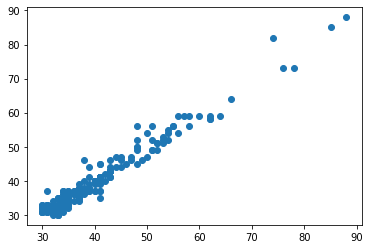

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(y_test,pred_y)

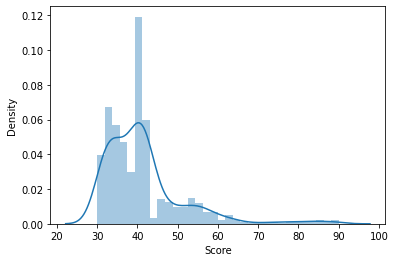

In [ ]:
sns.distplot(df['Score'])
plt.show()

In [ ]:
#naive bayes

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
model = BayesianRidge() 
model.fit(X_train, y_train) 

BayesianRidge()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
import sklearn.metrics as sm
print("---- Bayesian Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, prediction), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, prediction), 2)) 
print("R2 score =", round(sm.r2_score(y_test, prediction), 10))

---- Bayesian Regression - Model Evaluation ----
Mean absolute error = 0.24
Mean squared error = 0.08
Median absolute error = 0.26
Explain variance score = 1.0
R2 score = 0.9991128453


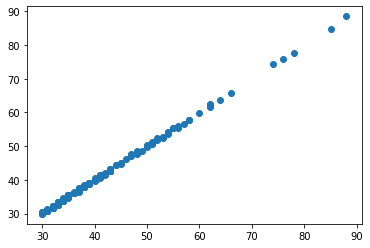

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
#KNN

In [ ]:
#importing the model and metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
knmodel = KNeighborsRegressor(n_neighbors=2)
knmodel.fit(X_train,y_train)
y_pred = knmodel.predict(X_test)

In [ ]:
train_score_knmodel = str(knmodel.score(X_train, y_train)*100)
test_score_knmodel = str(knmodel.score(X_test, y_test)*100)
print(f'Train Score : {train_score_knmodel[:5]}%\nTest Score : {test_score_knmodel[:5]}%')
models["knmodel"] = test_score_knmodel
prediction_knmodel = knmodel.predict(X_test)

Train Score : 99.58%
Test Score : 98.16%


In [ ]:
import sklearn.metrics as sm
print("---- KNN Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 10))

---- KNN Regression - Model Evaluation ----
Mean absolute error = 0.74
Mean squared error = 1.57
Median absolute error = 0.5
Explain variance score = 0.98
R2 score = 0.9816306428


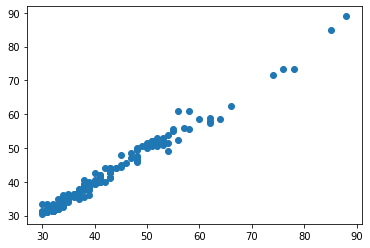

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
ypr = reg.predict(X_test)

In [ ]:
import sklearn.metrics as sm
print("---- Linear tree Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, ypr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, ypr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, ypr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, ypr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, ypr), 10))

---- Linear tree Regression - Model Evaluation ----
Mean absolute error = 0.24
Mean squared error = 0.08
Median absolute error = 0.26
Explain variance score = 1.0
R2 score = 0.9991128667


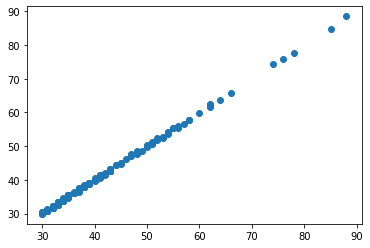

In [ ]:
plt.scatter(y_test,ypr)

80:20 splitting

In [ ]:
#splitting dataset into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Decision Tree
dtr.fit(X_train,y_train)
pred_y = dtr.predict(X_test)

In [ ]:
import sklearn.metrics as sm
print("---- Decision tree Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_y), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, pred_y), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_y), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_y), 2)) 
print("R2 score =", round(sm.r2_score(y_test, pred_y), 10))

---- Decision tree Regression - Model Evaluation ----
Mean absolute error = 0.88
Mean squared error = 2.13
Median absolute error = 0.0
Explain variance score = 0.98
R2 score = 0.9771211467


In [ ]:
train_score_tree = str(dtr.score(X_train, y_train) * 100)
test_score_tree = str(dtr.score(X_test, y_test) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree
prediction_dt = dtr.predict(X_test)

Train Score : 100.0%
Test Score : 97.71%


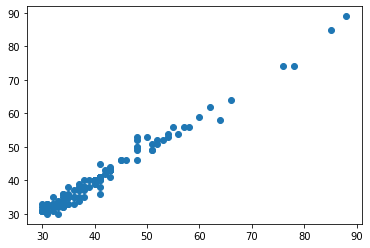

In [ ]:
plt.scatter(y_test,pred_y)

In [ ]:
#Naive Bayes
model = BayesianRidge() 
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [ ]:
import sklearn.metrics as sm
print("---- Bayesian Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, prediction), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, prediction), 2)) 
print("R2 score =", round(sm.r2_score(y_test, prediction), 10))

---- Bayesian Regression - Model Evaluation ----
Mean absolute error = 0.24
Mean squared error = 0.07
Median absolute error = 0.26
Explain variance score = 1.0
R2 score = 0.9991970397


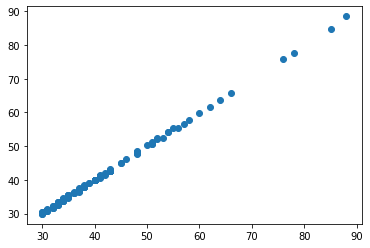

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
#KNN
knmodel = KNeighborsRegressor(n_neighbors=2)
knmodel.fit(X_train,y_train)
y_pred = knmodel.predict(X_test)

In [ ]:
train_score_knmodel = str(knmodel.score(X_train, y_train)*100)
test_score_knmodel = str(knmodel.score(X_test, y_test)*100)
print(f'Train Score : {train_score_knmodel[:5]}%\nTest Score : {test_score_knmodel[:5]}%')
models["knmodel"] = test_score_knmodel
prediction_knmodel = knmodel.predict(X_test)

Train Score : 99.62%
Test Score : 98.74%


In [ ]:
import sklearn.metrics as sm
print("---- KNN Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 10))

---- KNN Regression - Model Evaluation ----
Mean absolute error = 0.66
Mean squared error = 1.17
Median absolute error = 0.5
Explain variance score = 0.99
R2 score = 0.9874819988


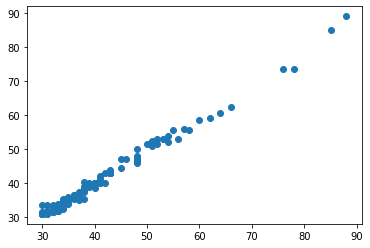

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
#Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
ypr = reg.predict(X_test)

In [ ]:
import sklearn.metrics as sm
print("---- Linear tree Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, ypr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, ypr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, ypr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, ypr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, ypr), 2))

---- Linear tree Regression - Model Evaluation ----
Mean absolute error = 0.24
Mean squared error = 0.07
Median absolute error = 0.26
Explain variance score = 1.0
R2 score = 1.0


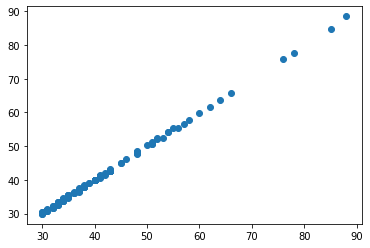

In [ ]:
plt.scatter(y_test,ypr)

In [ ]:
#predicting the Scores of new data
X1_new = DataFrame({
    'TLR': [63.8700,98.6544],
    'RPC': [20.8933,87.3655],
    'GO': [58.6100,90.000],
    'OI': [53.25874,56.771],
    'Perception': [15.2477,92.150]
})
X1_new

,TLR,RPC,GO,OI,Perception
0,63.8700,20.8933,58.61,53.25874,15.2477
1,98.6544,87.3655,90.00,56.77100,92.1500


In [ ]:
y1_new = reg.predict(X1_new)
y1_new

array([43.52770705, 88.26347729])

plitting dataset into 90:10

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
#Decision Tree
dtr.fit(X_train,y_train)
pred_y = dtr.predict(X_test)

In [ ]:
import sklearn.metrics as sm
print("---- Decision tree Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_y), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, pred_y), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_y), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_y), 2)) 
print("R2 score =", round(sm.r2_score(y_test, pred_y), 10))

---- Decision tree Regression - Model Evaluation ----
Mean absolute error = 0.99
Mean squared error = 2.55
Median absolute error = 1.0
Explain variance score = 0.97
R2 score = 0.966241451


In [ ]:
train_score_tree = str(dtr.score(X_train, y_train) * 100)
test_score_tree = str(dtr.score(X_test, y_test) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree
prediction_dt = dtr.predict(X_test)

Train Score : 100.0%
Test Score : 96.62%


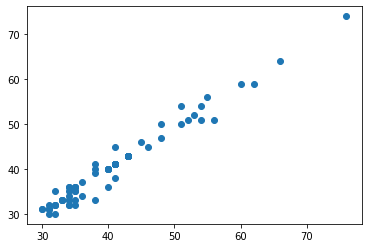

In [ ]:
plt.scatter(y_test,pred_y)

In [ ]:
#Naive Bayes
model = BayesianRidge() 
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [ ]:
import sklearn.metrics as sm
print("---- Bayesian Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, prediction), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, prediction), 2)) 
print("R2 score =", round(sm.r2_score(y_test, prediction), 10))

---- Bayesian Regression - Model Evaluation ----
Mean absolute error = 0.23
Mean squared error = 0.07
Median absolute error = 0.26
Explain variance score = 1.0
R2 score = 0.9990748864


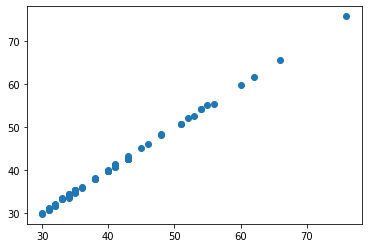

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
#KNN
knmodel = KNeighborsRegressor(n_neighbors=2)
knmodel.fit(X_train,y_train)
y_pred = knmodel.predict(X_test)

In [ ]:
train_score_knmodel = str(knmodel.score(X_train, y_train)*100)
test_score_knmodel = str(knmodel.score(X_test, y_test)*100)
print(f'Train Score : {train_score_knmodel[:5]}%\nTest Score : {test_score_knmodel[:5]}%')
models["knmodel"] = test_score_knmodel
prediction_knmodel = knmodel.predict(X_test)

Train Score : 99.62%
Test Score : 98.86%


In [ ]:
import sklearn.metrics as sm
print("---- KNN Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 10))

---- KNN Regression - Model Evaluation ----
Mean absolute error = 0.6
Mean squared error = 0.85
Median absolute error = 0.5
Explain variance score = 0.99
R2 score = 0.988693309


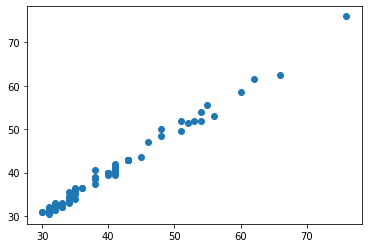

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
#Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
ypr = reg.predict(X_test)

In [ ]:
import sklearn.metrics as sm
print("---- Linear tree Regression - Model Evaluation ----")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, ypr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, ypr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, ypr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, ypr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, ypr), 2))

---- Linear tree Regression - Model Evaluation ----
Mean absolute error = 0.24
Mean squared error = 0.07
Median absolute error = 0.26
Explain variance score = 1.0
R2 score = 1.0


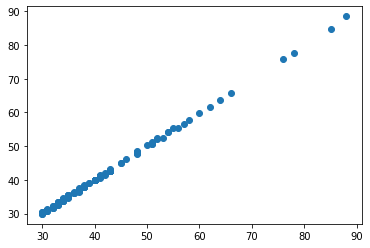

In [ ]:
plt.scatter(y_test,ypr)

In [ ]:
##predicting the Scores of new data
X_new = DataFrame({
    'TLR': [63.8700,98.6544],
    'RPC': [20.8933,87.3655],
    'GO': [58.6100,90.000],
    'OI': [53.25874,56.771],
    'Perception': [15.2477,92.150]
})
X_new

,TLR,RPC,GO,OI,Perception
0,63.8700,20.8933,58.61,53.25874,15.2477
1,98.6544,87.3655,90.00,56.77100,92.1500


In [ ]:
y_new = reg.predict(X_new)
y_new

array([43.52770705, 88.26347729])

Plotting the graph between the various models and their respective R2 Scores

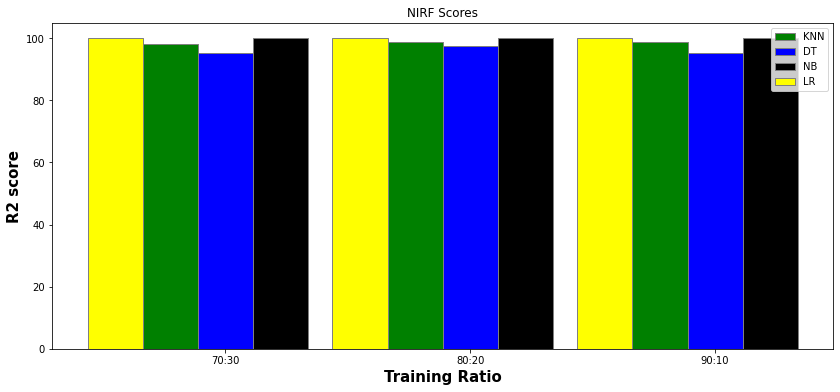

In [ ]:
#REGRESSION TYPE
# plotting of graph for R2 score
import numpy as np
import matplotlib.pyplot as plt
num_items=4
margin = 0.05
barWidth = (1.-2.*margin)/num_items
# set width of bar
#barWidth = 0.25
fig = plt.subplots(figsize =(14, 6))

# R2 Scores
KNN=[98.16,98.74,98.86]
DT=[95.25,97.53,95.07]
NB=[99.91,99.91,99.90]
LR=[99.91,100.00,100.00]

# Set position of bar on X axis
#br1 = np.arange(len(KNN))

br2 = np.arange(len(KNN))
br3 = np.arange(len(DT))
br4 = np.arange(len(NB))
br5 = np.arange(len(LR))
br2 = [x + barWidth for x in br2]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

#COMPARISON OF ACCURACIES:
#plt.bar(br1, KNN, color ='r', width = barWidth,
#		edgecolor ='grey', label ='KNN')


plt.bar(br2, KNN, color ='g', width = barWidth,
		edgecolor ='grey', label ='KNN')
plt.bar(br3, DT, color ='b', width = barWidth,
                edgecolor ='grey', label ='DT')
plt.bar(br4, NB, color ='black', width = barWidth,
		edgecolor ='grey', label ='NB')
plt.bar(br5, LR, color ='yellow', width = barWidth,
		edgecolor ='grey', label ='LR')

# Adding Xticks
plt.xlabel('Training Ratio', fontweight ='bold', fontsize = 15)
plt.ylabel('R2 score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth*2 for r in range(len(KNN))],['70:30','80:20','90:10'])
plt.title("NIRF Scores")
plt.legend(loc=1)
plt.show()

#OBJECTIVES

In [ ]:
df_scores = dt[['Institute Name', 'Score_21', 'Score_20', 'Score_19']]

df_scores.loc[:,'Nan'] = df_scores.isnull().sum(axis=1)
df_scores = df_scores[df_scores['Nan'] < 4]
df_scores.reset_index(inplace=True, drop=True)
df_scores = df_scores.drop(columns='Nan', axis=1)

df_scores = df_scores[['Institute Name', 'Score_19', 'Score_20', 'Score_21']]
df_scores.head()

,Institute Name,Score_19,Score_20,Score_21
0,Indian Institute of Technology Madras,89.05,89.93,90.19
1,Indian Institute of Technology Delhi,85.36,88.08,88.96
2,Indian Institute of Technology Bombay,84.40,85.08,85.16
3,Indian Institute of Technology Kanpur,77.57,82.18,83.22
4,Indian Institute of Technology Kharagpur,79.41,80.56,82.03


Year wise trends for colleges


Performance of Top 10 Institutes

In [ ]:
import pandas as pd
pd.set_option('mode.chained_assignment',None)
pd.options.plotting.backend = "plotly"

#Performance of Top 10 Institutes
fig = df_scores.head(10).set_index('Institute Name').T.plot()
fig.update_layout(width=1000, height=500)
fig.show()

Performance of Bottom 10 Institutes

In [ ]:
fig = df_scores.tail(10).set_index('Institute Name').T.plot()
fig.update_layout(width=1000, height=500)
fig.show()

Performance of IITs

In [ ]:
sp_df = df_scores[df_scores['Institute Name'].str.contains('Indian Institute of Technology')]
fig = sp_df.set_index('Institute Name').T.plot()
fig.update_layout(width=1000, height=500)
fig.show()

Performance Of NITs

In [ ]:
sp_df = df_scores[df_scores['Institute Name'].str.contains('National Institute of Technology')]
fig = sp_df.set_index('Institute Name').T.plot()
fig.update_layout(width=1000, height=500)
fig.show()

TLR trend of top 10 colleges

In [ ]:
TLR_trend = dt[['Institute Name', 'City', 'TLR_21', 'TLR_20', 'TLR_19']]

TLR_trend.loc[:,'Nan'] = TLR_trend.isnull().sum(axis=1)
TLR_trend = TLR_trend[TLR_trend['Nan'] < 4]
TLR_trend.reset_index(inplace=True, drop=True)
TLR_trend = TLR_trend.drop(columns='Nan', axis=1)

TLR_trend = TLR_trend[['Institute Name', 'City', 'TLR_19', 'TLR_20', 'TLR_21']]
TLR_trend.head()

,Institute Name,City,TLR_19,TLR_20,TLR_21
0,Indian Institute of Technology Madras,Chennai,93.55,95.42,95.47
1,Indian Institute of Technology Delhi,New Delhi,85.80,90.79,91.76
2,Indian Institute of Technology Bombay,Mumbai,89.12,91.00,89.32
3,Indian Institute of Technology Kanpur,Kanpur,79.07,86.22,86.71
4,Indian Institute of Technology Kharagpur,Kharagpur,73.14,77.32,80.51


In [ ]:
fig = TLR_trend.head(10).set_index('Institute Name').T.plot()
fig.update_layout(width=1000, height=500)
fig.show()

TLR trend of JSSSTU & NIE

In [ ]:
sp_df2 = TLR_trend[TLR_trend['City'].str.contains('Mysuru')]
sp_df1 = TLR_trend[TLR_trend['City'].str.contains('Mysore')]
sp_df = sp_df1.append(sp_df2)
fig = sp_df.set_index('Institute Name').T.plot()
fig.update_layout(width=1000, height=500)
fig.show()

GO trend of JSSSTU & NIE

In [ ]:
GO_trend = dt[['Institute Name', 'City', 'GO_21', 'GO_20', 'GO_19']]

GO_trend.loc[:,'Nan'] = GO_trend.isnull().sum(axis=1)
GO_trend = GO_trend[GO_trend['Nan'] < 4]
GO_trend.reset_index(inplace=True, drop=True)
GO_trend = GO_trend.drop(columns='Nan', axis=1)
GO_trend = GO_trend[['Institute Name', 'City', 'GO_19', 'GO_20', 'GO_21']]
GO_trend.head()

,Institute Name,City,GO_19,GO_20,GO_21
0,Indian Institute of Technology Madras,Chennai,84.36,83.90,81.92
1,Indian Institute of Technology Delhi,New Delhi,80.32,80.36,80.97
2,Indian Institute of Technology Bombay,Mumbai,76.47,77.60,79.71
3,Indian Institute of Technology Kanpur,Kanpur,82.56,88.44,89.79
4,Indian Institute of Technology Kharagpur,Kharagpur,84.12,83.21,83.01


In [ ]:
GO_df2 = GO_trend[GO_trend['City'].str.contains('Mysuru')]
GO_df1 = GO_trend[GO_trend['City'].str.contains('Mysore')]
GO_df = GO_df1.append(GO_df2)
fig = GO_df.set_index('Institute Name').T.plot()
fig.update_layout(width=1000, height=500)
fig.show()

RPC trend of JSSSTU & NIE

In [ ]:
RPC_trend = dt[['Institute Name', 'City', 'RPC_21', 'RPC_20', 'RPC_19']]

RPC_trend.loc[:,'Nan'] = RPC_trend.isnull().sum(axis=1)
RPC_trend = RPC_trend[RPC_trend['Nan'] < 4]
RPC_trend.reset_index(inplace=True, drop=True)
RPC_trend = RPC_trend.drop(columns='Nan', axis=1)
RPC_trend = RPC_trend[['Institute Name', 'City', 'RPC_19', 'RPC_20', 'RPC_21']]

RPC_df2 = RPC_trend[RPC_trend['City'].str.contains('Mysuru')]
RPC_df1 = RPC_trend[RPC_trend['City'].str.contains('Mysore')]
RPC_df = RPC_df1.append(RPC_df2)
fig = RPC_df.set_index('Institute Name').T.plot()
fig.update_layout(width=1000, height=500)
fig.show()

OI trend of JSSSTU & NIE

In [ ]:
OI_trend = dt[['Institute Name', 'City', 'OI_21', 'OI_20', 'OI_19']]

OI_trend.loc[:,'Nan'] = OI_trend.isnull().sum(axis=1)
OI_trend = OI_trend[OI_trend['Nan'] < 4]
OI_trend.reset_index(inplace=True, drop=True)
OI_trend = OI_trend.drop(columns='Nan', axis=1)
OI_trend = OI_trend[['Institute Name', 'City', 'OI_19', 'OI_20', 'OI_21']]

OI_df2 = OI_trend[OI_trend['City'].str.contains('Mysuru')]
OI_df1 = OI_trend[OI_trend['City'].str.contains('Mysore')]
OI_df = OI_df1.append(OI_df2)
fig = OI_df.set_index('Institute Name').T.plot()
fig.update_layout(width=1000, height=500)
fig.show()

State wise college list (Karnataka)

In [ ]:
kar_trend = dt[['Institute Name', 'State', 'Score_21', 'Score_20', 'Score_19']]

kar_trend.loc[:,'Nan'] = kar_trend.isnull().sum(axis=1)
kar_trend = kar_trend[kar_trend['Nan'] < 4]
kar_trend.reset_index(inplace=True, drop=True)
kar_trend = kar_trend.drop(columns='Nan', axis=1)
kar_trend = kar_trend[['Institute Name', 'State', 'Score_19', 'Score_20', 'Score_21']]
kar_df = kar_trend[kar_trend['State'].str.contains('Karnataka')]
kar_df

,Institute Name,State,Score_19,Score_20,Score_21
9,National Institute of Technology Karnataka,Karnataka,55.25000,61.30000,64.19000
50,Manipal Institute of Technology,Karnataka,47.31000,49.06000,48.17000
56,Visvesvaraya Technological University,Karnataka,40.27635,45.37000,45.63000
64,M. S. Ramaiah Institute of Technology,Karnataka,40.54000,43.74000,43.74000
75,International Institute of Information Technol...,Karnataka,40.51000,43.55000,41.64000
76,R.V. College of Engineering,Karnataka,40.88000,41.02000,41.52000
82,PES University,Karnataka,32.28000,37.94000,41.06000
97,B.M.S. College of Engineering,Karnataka,39.67000,40.35000,39.13000
100,Siddaganga Institute of Technology,Karnataka,37.98000,38.23000,38.81000
137,NMAM Institute of Technology,Karnataka,33.84000,34.73000,35.93000


STATE WISE RANKING

In [ ]:
State_trend = dt[['State', 'Score_21', 'Score_20', 'Score_19']]

State_trend.loc[:,'Nan'] = State_trend.isnull().sum(axis=1)
State_trend = State_trend[State_trend['Nan'] < 4]
State_trend.reset_index(inplace=True, drop=True)
State_trend = State_trend.drop(columns='Nan', axis=1)
State_trend = State_trend[['State', 'Score_19', 'Score_20', 'Score_21']]

a =State_trend.groupby('State').mean()
a

,Score_19,Score_20,Score_21
State,,,
Andaman and Nicobar Islands,30.350000,41.758350,43.209750
Andhra Pradesh,34.564025,37.096671,41.189857
Arunachal Pradesh,35.838175,32.380000,33.985000
Assam,49.258175,51.809587,50.945000
Bihar,44.220000,46.975000,49.720000
Chandigarh,41.005000,40.935000,41.390000
Chhattisgarh,39.090000,41.580000,44.830000
Delhi,49.052336,50.275714,50.700000
Goa,37.060000,39.930000,40.600000


In [ ]:
fig = a.T.plot()
fig.update_layout(width=1000, height=500)
fig.show()

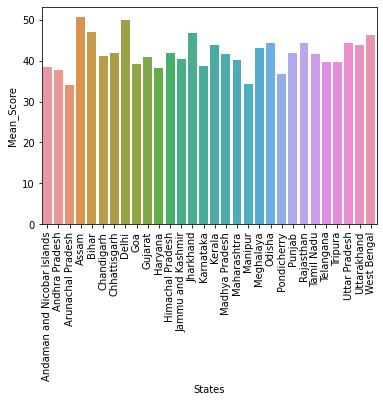

In [ ]:
a['States'] = a.index
a['Mean_Score']= a[['Score_19', 'Score_20','Score_21']].mean(axis=1)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
  
sns.barplot(x=a['States'],y=a['Mean_Score'], data=a )
plt.xticks(range(len(a['States'])), a['States'], rotation='vertical')
plt.show()

Engineering college rank consistency of Mysore and Bengaluru colleges

In [ ]:
Rank_trend = dt[['Institute Name','City', 'Rank_21', 'Rank_20', 'Rank_19']]

Rank_trend.loc[:,'Nan'] = Rank_trend.isnull().sum(axis=1)
Rank_trend = Rank_trend[Rank_trend['Nan'] < 4]
Rank_trend.reset_index(inplace=True, drop=True)
Rank_trend = Rank_trend.drop(columns='Nan', axis=1)

Rank_trend = Rank_trend[['Institute Name','City', 'Rank_19', 'Rank_20', 'Rank_21']]

r_df2 = Rank_trend[Rank_trend['City'].str.contains('Mysuru')]
r_df1 = Rank_trend[Rank_trend['City'].str.contains('Mysore')]
r_df1 = Rank_trend[Rank_trend['City'].str.contains('Bengaluru')]
r_df = r_df1.append(r_df2)
fig = r_df.set_index('Institute Name').T.plot()
fig.update_layout(width=1000, height=500)
fig.show()

State wise OI intake ranking

In [ ]:
State_OI_trend = dt[['State', 'OI_21', 'OI_20', 'OI_19']]

State_OI_trend.loc[:,'Nan'] = State_OI_trend.isnull().sum(axis=1)
State_OI_trend = State_OI_trend[State_OI_trend['Nan'] < 4]
State_OI_trend.reset_index(inplace=True, drop=True)
State_OI_trend = State_OI_trend.drop(columns='Nan', axis=1)
State_OI_trend = State_OI_trend[['State', 'OI_19', 'OI_20', 'OI_21']]

b =State_OI_trend.groupby('State').mean()

fig = b.T.plot()
fig.update_layout(width=1000, height=500)
fig.show()

Comparative analysis of TLR and GO

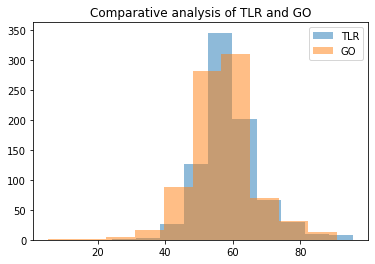

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plotting histograms
plt.hist(df['TLR'],
         alpha=0.5,
         label='TLR')
  
plt.hist(df['GO'], 
         alpha=0.5,
         label='GO')
  
plt.legend(loc='upper right')
plt.title('Comparative analysis of TLR and GO')
plt.show()

Comparative analysis of OI and GO

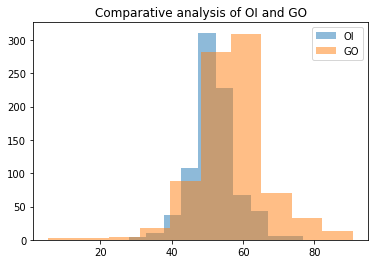

In [ ]:
plt.hist(df['OI'],
         alpha=0.5,
         label='OI')
  
plt.hist(df['GO'], 
         alpha=0.5,
         label='GO')
  
plt.legend(loc='upper right')
plt.title('Comparative analysis of OI and GO')
plt.show()

In [ ]:
dt

,Institute Id,Institute Name,City,State,Score_21,Rank_21,TLR_21,RPC_21,GO_21,OI_21,...,OI_20,Perception_20,Score_19,Rank_19,TLR_19,RPC_19,GO_19,OI_19,Perception_19,Means
0,IR-E-U-0456,Indian Institute of Technology Madras,Chennai,Tamil Nadu,90.19000,1.00,95.4700,96.4300,81.9200,62.44000,...,61.3100,100.00000,89.05000,1.00,93.55000,92.39000,84.3600,63.99000,100.00000,89.723333
1,IR-E-I-1074,Indian Institute of Technology Delhi,New Delhi,Delhi,88.96000,2.00,91.7600,95.8200,80.9700,66.39000,...,64.8100,94.46000,85.36000,2.00,85.80000,96.18000,80.3200,56.19000,90.85000,87.466667
2,IR-E-U-0306,Indian Institute of Technology Bombay,Mumbai,Maharashtra,85.16000,3.00,89.3200,92.5600,79.7100,53.68000,...,49.9900,92.51000,84.40000,3.00,89.12000,95.30000,76.4700,48.17000,89.61000,84.880000
3,IR-E-I-1075,Indian Institute of Technology Kanpur,Kanpur,Uttar Pradesh,83.22000,4.00,86.7100,83.1300,89.7900,55.96000,...,54.2100,85.78000,77.57000,5.00,79.07000,81.79000,82.5600,46.61000,81.35000,80.990000
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,Kharagpur,West Bengal,82.03000,5.00,80.5100,88.5900,83.0100,58.46000,...,56.6200,89.31000,79.41000,4.00,73.14000,88.20000,84.1200,57.79000,84.14000,80.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,IR17-ENGG-1-26228,C.V. Raman College of Engineering,Bhubneshwar,Odisha,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765,41.748150
269,IR17-ENGG-2-10476,"Maharashtra Institute of Technology, Pune",Pune,Maharashtra,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765,41.748150
270,IR17-ENGG-2-12411,Sri Sai Ram Engineering College,Chennai,Tamil Nadu,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765,41.748150
271,IR17-ENGG-2-12581,ST. Joseph's College of Engineering,Chennai,Tamil Nadu,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,51.8737,14.21465,40.27635,100.42,57.74225,17.92015,56.2264,50.42485,12.90765,41.748150


In [ ]:
dt['Score19'] = dt['Score_19'].astype(int)
dt['Score20'] = dt['Score_20'].astype(int)
dt['Score21'] = dt['Score_21'].astype(int)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
le = LabelEncoder()
for col in ['Institute Name']:
    dt[col] = le.fit_transform(dt[col])

dt['Means']= dt[['Score19', 'Score20','Score21']].mean(axis=1)
dt['Means'] = dt['Means'].astype(int)

dt

,Institute Id,Institute Name,City,State,Score_21,Rank_21,TLR_21,RPC_21,GO_21,OI_21,...,Rank_19,TLR_19,RPC_19,GO_19,OI_19,Perception_19,Means,Score19,Score20,Score21
0,IR-E-U-0456,94,Chennai,Tamil Nadu,90.19000,1.00,95.4700,96.4300,81.9200,62.44000,...,1.00,93.55000,92.39000,84.3600,63.99000,100.00000,89,89,89,90
1,IR-E-I-1074,86,New Delhi,Delhi,88.96000,2.00,91.7600,95.8200,80.9700,66.39000,...,2.00,85.80000,96.18000,80.3200,56.19000,90.85000,87,85,88,88
2,IR-E-U-0306,85,Mumbai,Maharashtra,85.16000,3.00,89.3200,92.5600,79.7100,53.68000,...,3.00,89.12000,95.30000,76.4700,48.17000,89.61000,84,84,85,85
3,IR-E-I-1075,92,Kanpur,Uttar Pradesh,83.22000,4.00,86.7100,83.1300,89.7900,55.96000,...,5.00,79.07000,81.79000,82.5600,46.61000,81.35000,80,77,82,83
4,IR-E-U-0573,93,Kharagpur,West Bengal,82.03000,5.00,80.5100,88.5900,83.0100,58.46000,...,4.00,73.14000,88.20000,84.1200,57.79000,84.14000,80,79,80,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,IR17-ENGG-1-26228,29,Bhubneshwar,Odisha,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,100.42,57.74225,17.92015,56.2264,50.42485,12.90765,41,40,41,43
269,IR17-ENGG-2-10476,134,Pune,Maharashtra,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,100.42,57.74225,17.92015,56.2264,50.42485,12.90765,41,40,41,43
270,IR17-ENGG-2-12411,232,Chennai,Tamil Nadu,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,100.42,57.74225,17.92015,56.2264,50.42485,12.90765,41,40,41,43
271,IR17-ENGG-2-12581,205,Chennai,Tamil Nadu,43.20975,100.45,60.3007,22.6047,57.3063,53.25895,...,100.42,57.74225,17.92015,56.2264,50.42485,12.90765,41,40,41,43


In [ ]:
dff = DataFrame({
    'IN': dt['Institute Name'],
    'Mean': dt['Means']
})
dff

,IN,Mean
0,94,89
1,86,87
2,85,84
3,92,80
4,93,80
...,...,...
268,29,41
269,134,41
270,232,41
271,205,41


Clustering universities based on scores

[[190.          39.61818182]
 [ 81.53703704  48.22222222]
 [ 27.          39.4       ]
 [135.46296296  39.74074074]
 [245.          38.01818182]]


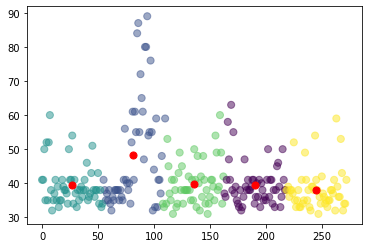

In [ ]:
#Clustering universities based on scores
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(dff)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(dff['IN'], dff['Mean'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()